In [63]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
June_Temps_query = session.query(Measurement.tobs).\
filter(extract('month',Measurement.date)==6).all()


In [5]:
#  3. Convert the June temperatures to a list.
June_Temps_list = []
June_Temps_list = June_Temps_query

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_Temps = pd.DataFrame(June_Temps_list)


In [7]:
June_Temps.head()

,tobs
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_Temps.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
Dec_temps_query = session.query(Measurement.tobs).\
filter(extract("month",Measurement.date) ==12 ).all()

In [10]:
# 7. Convert the December temperatures to a list.
Dec_temps_list = []
Dec_temps_list = Dec_temps_query

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(Dec_temps_list)
dec_temps_df.head()

,tobs
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Addition queries


In [96]:
list3 = []
list3 = session.query(Measurement.prcp).filter(extract("month",Measurement.date) == 6).all()

prcp_df = pd.DataFrame(list3)
prcp_df.rename(columns={"prcp":"June prcp"},inplace=True)
prcp_df.describe()

,June prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [97]:
list4 = []
list4 = session.query(Measurement.prcp).filter(extract("month",Measurement.date) == 12).all()

prcp_df = pd.DataFrame(list4)
prcp_df.rename(columns={"prcp":"Dec prcp"},inplace=True)
prcp_df.describe()

,Dec prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [116]:


list6=session.query(Measurement.date,func.avg(Measurement.prcp)).\
filter(extract("month",Measurement.date) == 6).\
group_by(extract("year",Measurement.date)).all()

df6=pd.DataFrame(list6,columns=["date",'June Prcp Avg']).set_index("date")
df6

,June Prcp Avg
date,
2010-06-01,0.042241
2011-06-01,0.240142
2012-06-01,0.097062
2013-06-01,0.144195
2014-06-01,0.124372
2015-06-01,0.125160
2016-06-01,0.212312
2017-06-01,0.120000


<AxesSubplot:title={'center':'Prcp Change on June From 2010 to 2016'}, xlabel='date'>

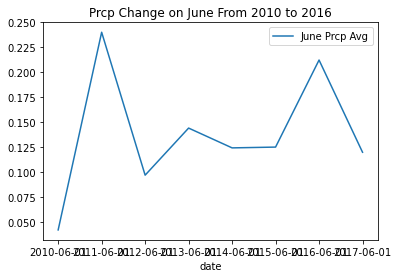

In [117]:
df6.plot(title="Prcp Change on June From 2010 to 2016")

In [108]:

list7=session.query(Measurement.date,func.avg(Measurement.prcp)).\
filter(extract("month",Measurement.date) == 12).\
group_by(extract("year",Measurement.date)).all()
df7=pd.DataFrame(list7,columns=["date",'Dec Prcp Acg']).set_index("date")
df7

,Dec prcp mean
date,
2010-12-01,0.459087
2011-12-01,0.201581
2012-12-01,0.089604
2013-12-01,0.169014
2014-12-01,0.188439
2015-12-01,0.169506
2016-12-01,0.199494


<AxesSubplot:title={'center':'Prcp Change on Dec From 2010 to 2016'}, xlabel='date'>

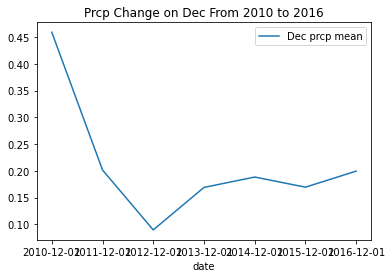

In [115]:
df7.plot(title="Prcp Change on Dec From 2010 to 2016")